In [13]:
from Zernike import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def np_analytic_polynomial(x, n, m ):
    y = np.array( [ analytic_polynomial(n, m, rho) for rho in x ] )
     
    return y
pass # -- np_analytic_polynomial

In [3]:
def analytic_polynomial(n, m, rho):
    m = abs( m )
    
    R = 0 
    r = rho
    
    if n == 0 :
        if m == 0 :
            R = 1
        pass
    elif n == 1 :
        if m == 0 :
            R = -2 + 3*r
        elif m == 1 :
            R = r
        pass            
    elif n == 2 :
        if m == 0 :
            R = 3 + 10*(r**2) - 12*r
        elif m == 1 :
            R = 5*(r**2) - 4*r
        elif m == 2 :
            R = r**2
        pass
    elif n == 3 :
        if m == 0 :
            R = -4 + 35*(r**3) - 60*(r**2) + 30*r
        elif m == 1 :
            R = 21*(r**3) - 30*(r**2) + 10*r
        elif m == 2 :
            R = 7*(r**3) -6*(r**2)
        elif m == 3 :
            R = r**3
        pass
    elif n == 4 :
        if m == 0 :
            R = 5 + 126*(r**4) - 280*(r**3) + 210*(r**2) - 60*r
        elif m == 1 :
            R = 84*(r**4) - 168*(r**3) + 105*(r**2) - 20*r
        elif m == 2 :
            R = 36*(r**4) - 56*(r**3) + 21*(r**2)
        elif m == 3 :
            R = 94*(r**4) - 8*(r**3)
        elif m == 4 :
            R = r**4
        pass
    elif n == 5 :
        if m == 0 :
            R = -6 + 462*(r**5) - 1260*(r**4) + 1260*(r**3) - 560*(r**2) + 105*r
        elif m == 1 :
            R = 330*(r**5) - 840*(r**4) + 756*(r**3) - 280*(r**2) + 35*r
        elif m == 2 :
            R = 165*(r**5) - 360*(r**4) + 252*(r**3) - 56*(r**2)
        elif m == 3 :
            R = 55*(r**5) - 90*(r**4) + 36*(r**3)
        elif m == 4 :
            R = 11*(r**5) - 10*(r**4)
        elif m == 5 :
            R = r**5
        pass
    pass

    return R
pass # -- analytic_polynomial 

INFO <ipython-input-26-dad75cdd2337>:0001 Hello ...

INFO Zernike.py:0044 Create tables ...
 
INFO Zernike.py:0038 Commit
INFO <ipython-input-26-dad75cdd2337>:0022 e = 0.001


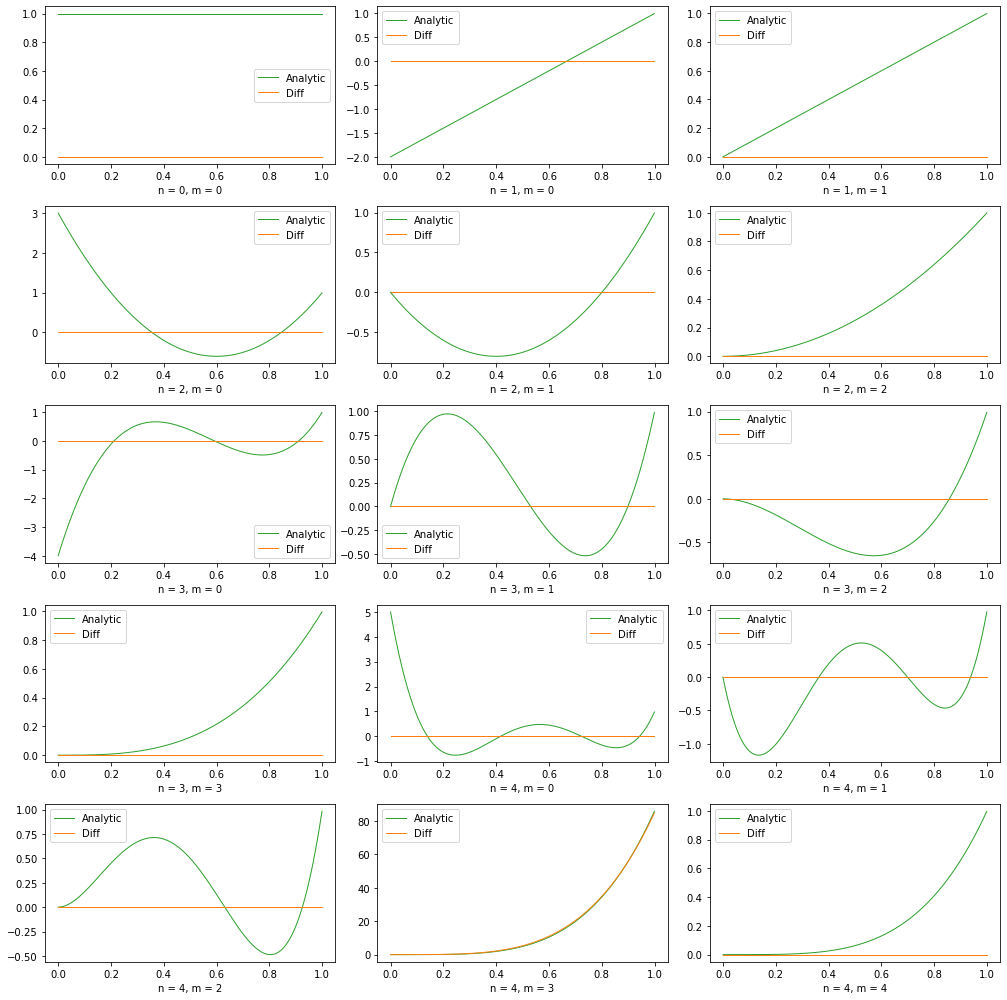

INFO Profiler.py:0085 *** The function[ np_numeric_polynomial ] Average: 0.082 sec(s), Max: 0.104 sec(s), Call : 301 times. 
INFO Profiler.py:0085 *** The function[     select_polynomial ] Average: 0.000 sec(s), Max: 0.002 sec(s), Call : 301000 times. 
INFO <ipython-input-26-dad75cdd2337>:0055 Done!


In [26]:
log.info( "Hello ...\n" )
    
zernike = Zernike()

n_max = 4
m_max = 0

ncols = 3
nrows = n_max + 1
nrows = nrows*(nrows+1)/2/ncols 
nrows = int( nrows )

plt.rcParams['figure.figsize'] = [14, 14]

fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
axes = axes.ravel()
    
ax_idx = -1

e = 0.001

log.info( f"e = {e}")

debug = 0 

for n in range( 0, n_max + 1 ) :
    for m in range( 0, n + 1 ):
        x = np.arange(0, 1, e) 

        y_analytic = np_analytic_polynomial(x, n, m)            
        y_numeric = zernike.np_numeric_polynomial(x, n, m)

        if debug :
            log.info( f"x = {x}")
            log.info( f"y = {y_analytic}")
        pass

        diff = y_analytic - y_numeric
        
        ax_idx += 1     
        ax = axes[ ax_idx ]

        ax.plot(x, y_analytic,  '-', color='C2', label='Analytic', linewidth=1 )
        ax.plot(x, diff , '-', color='C1', label='Diff' , linewidth=1 )

        ax.legend()            
        ax.set_xlabel( f"n = {n}, m = {m}" )        
    pass
pass 

plt.tight_layout()
plt.show()

print_profile()
log.info( "Done!" )

In [6]:
print_profile()

INFO Profiler.py:0085 *** The function[ np_numeric_polynomial ] Average: 0.082 sec(s), Max: 0.087 sec(s), Call : 30 times. 
INFO Profiler.py:0085 *** The function[     select_polynomial ] Average: 0.000 sec(s), Max: 0.001 sec(s), Call : 30000 times. 
